# Support Vector Machines

_Adapted from Yish's interpretation of Chapter 9 of Introduction to Statistical Learning in R_

## Support Vector Classifier

SVMs approach the classification problem in a direct way - __we try and find a plane that separates the classes in the feature space__

If we cannot, we do one of the two things:

- We __soften__ what we mean by "separates" 
- We __enlarge__ the feature space so that the separation is possible

__Notes on Terminology__:

- Support vector machines are sometimes used as a general method that incorporate maximal margin classifier, support vector classifiers etc. However, strictly by definition, support vector machine is a support vector classifier utilized with non-linear kernel. 

> "When the support vector classifier is combined with a non-linear kernel such as (9.22), the resulting classifier is known as a support vector machine." -- P366, ISLR


Example of a boundary hyperplane in a two dimensional space:

<img src="images/exampleboundary.png" width=500>

### Maximal Margin Classifier

SVM tackles the problem of classification directly, in the sense that it does not compute a probabilistic model. Instead, it constructs a hyperplane to directly separate the classes. 

For example:

![](images/manyboundaries.png)

However, the problem with this approach is that we can come up with infinite number of such hyperplanes as we can tilt the line back and forth and it would still serve the same purpose.

__Therefore, we are using the hyperplane such that the it would be the farthest from training observations from either side__. The intuition behind it is that if we have chosen a hyperplane that is far from the training observations, it would be far for the testing observations as well. <br>

The distance between the training observations and the hyperplane is called the _margin_, and the classifier aims to find the maximal margin from the hyperplane that separates the training examples:

<img src="images/bestboundary.png" width=500>

## Soft Margin Classifier

Even though the maximal margin classifier sounds like an intuitive idea and not too difficult to optimize for, it might not be desirable under two circumstances:

1. It will be sensitive to individual training observations
2. The algorithm will not converge if the training observations cannot be linearly separated.

![](images/softboundary.png)

What happens if we cannot come up with a hyperplane that perfectly separates the training observations like the ones above? The first solution is the soft margin classifier, where we can loosen up our definition of the margin. 

<img src="images/withoutboundary.png" width=500>

__Rather than seeking the largest possible margin so that every observation is not only on the correct side of the hyperplane but also on the correct side of the margin, we instead allow some observations to be on the incorrect side of the margin, or even on the incorrect side of the hyperplane.__

![](images/errortolerance.png)

In this case, the hyperparameter ε is known as the slack variables, which dictate how many training observations we allow to violate the rule of margins or even the hyperplane. The amount of slack is bounded by C accordingly.

The parameter εi tells us where the ith training observation is located. 
- If εi = 0, then we say the ith training observation is on the correct side of the margin;
- If εi > 0, then we say it has violated the margin
- If εi > 1, then it is on the wrong side of the hyperplane

The value C is the sum of ε across all i training observations. The parameter C controls the bias-variance tradeoff of the statistical technique. A high value of C meaning we are more tolerant of the violation, which in turn might give us a model that has high bias but low variance; however, a low value of C indicates low tolerance of the violation, potentially giving us more variance but less bias. 

__How do we determine the ideal value of C?__

![](images/impactofchyperparameter.png)

__Note!__

In scikit-learn implementation, `c` is defined as the inverse. A higher value of `c` is a smaller regularization or smaller penalty, whereas a lower value of `c` is a higher penalty.

__Note!__
It is important to point out that in the support vector classfier (or SVM) in general, only the vectors on the margins are used for classification. They are called the __"Support Vectors"__

## "The Kernel Trick"

Sometimes we have training data that are not able to be separated even with softened margin:

![](images/needforkerneltrick.png)

The intuition to find the optimal fit is called feature space expansion:

- First, we __enlarge__ the feature space through the use of kernel
- Fit a support vector classifier in the enlarged space 
- This results in nonlinear decision boundaries in the original space 


<img src="images/nonlinearring.png" width=500>

<img src="images/nonlinearringin3d.png" width=500>

Why do we know that enlarging the feature space makes the data more linearly separable? [Cover's Theorem](https://en.wikipedia.org/wiki/Cover%27s_theorem).

Another view:

![](images/kernel_trick_hyperdimensional.png)

## Implementation & Performance Comparison

Docs: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  

from sklearn.model_selection import train_test_split  
from time import time

### Original Smaller Dataset 

In [2]:
## ORIGINAL DATA

df0 = pd.read_csv('data/data_banknote_authentication.csv', header = None)

# our data needs column names
headers = ["Variance", "Skewness", "Curtosis", "Entropy", "Class"]
df0.columns = headers

display(df0.head(),df0.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


None

In [3]:
# define X and y, then train test split
X0 = df0.drop('Class', axis=1)  
y0 = df0['Class'] 
X_train0, X_test0, y_train0, y_test0 = train_test_split(X0, y0, test_size = 0.20) 
X_train0

,Variance,Skewness,Curtosis,Entropy
764,-1.66770,-7.153500,7.89290,0.967650
1111,-6.36790,8.010200,0.42470,-3.220700
117,2.10800,6.795500,-0.17080,0.490500
668,0.57060,-0.024841,1.24210,-0.562080
30,-0.24811,-0.177970,4.90680,0.154290
...,...,...,...,...
1141,-0.49081,2.845200,-3.64360,-3.100400
1037,-1.79760,-6.768600,6.67530,0.899120
1148,-0.26654,-0.645620,-0.42014,0.891360
823,-1.97900,3.230100,-1.35750,-2.581900


# 📙 Predicting Recidivism with SVC

## OBTAIN

- Iowa has a major problem with recidivism,  where ~38% of all inmates released from prison wind up back in jail after returning to a life of crime (AKA recidivism).
- Dataset contains information on released prisoners and if they returned to prison within 3 years of being release. 
    - Dataset can be [found on Kaggle](https://www.kaggle.com/slonnadube/recidivism-for-offenders-released-from-prison), which was extracted from [Iowa's data portal](https://data.iowa.gov/Correctional-System/3-Year-Recidivism-for-Offenders-Released-from-Pris/mw8r-vqy4). 

- We will be using a partially pre-processed version of the dataset (columns have been renamed/simplified).

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-3-final-project-online-ds-ft-021119/master/LSA_map_with_counties_districts_and_B54A5BBCE4156.jpg" width=20%> 



In [4]:
%load_ext autoreload
%autoreload 2
import functions_022221FT as fn

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-notebook')

renamed_data = 'https://raw.githubusercontent.com/jirvingphd/dsc-3-final-project-online-ds-ft-021119/master/datasets/Iowa_Prisoners_Renamed_Columns_fsds_100719.csv'
df = pd.read_csv(renamed_data,index_col=0)

## Drop unwanted cols using year
df = df.drop(columns=['yr_released','report_year'])
display(df.head(),df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26020 entries, 0 to 26019
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   race_ethnicity  25990 non-null  object
 1   age_released    26017 non-null  object
 2   crime_class     26020 non-null  object
 3   crime_type      26020 non-null  object
 4   crime_subtype   26020 non-null  object
 5   release_type    24258 non-null  object
 6   super_dist      16439 non-null  object
 7   recidivist      26020 non-null  object
 8   target_pop      26020 non-null  object
 9   sex             26017 non-null  object
dtypes: object(10)
memory usage: 2.2+ MB


,race_ethnicity,age_released,crime_class,crime_type,crime_subtype,release_type,super_dist,recidivist,target_pop,sex
0,Black - Non-Hispanic,25-34,C Felony,Violent,Robbery,Parole,7JD,Yes,Yes,Male
1,White - Non-Hispanic,25-34,D Felony,Property,Theft,Discharged – End of Sentence,NaN,Yes,No,Male
2,White - Non-Hispanic,35-44,B Felony,Drug,Trafficking,Parole,5JD,Yes,Yes,Male
3,White - Non-Hispanic,25-34,B Felony,Other,Other Criminal,Parole,6JD,No,Yes,Male
4,Black - Non-Hispanic,35-44,D Felony,Violent,Assault,Discharged – End of Sentence,NaN,Yes,No,Male


None

## SCRUB

- Null values (fill or drop)
- Data Types (finding categorical variables)
- Inspect the value_counts/labels of categoricals
- Scaling or lack-off
- One hot encoding


In [6]:
## Check null values
# import missingno
# missingno.matrix(df)
# plt.show()
# null_check = pd.DataFrame({
#     '#null':df.isna().sum(),
#     '%null':round(df.isna().sum()/len(df)*100,2)
# })
# null_check

In [7]:
# ## inspect categories
# dashes = '---'*20
# for col in df.columns:
#     print(dashes)
#     print(f"Value Counts for {col}:")
#     display(df[col].value_counts(dropna=False))

### Feature Engineering

#### `race_ethnicity`

In [8]:
# df['race_ethnicity'].value_counts(dropna=False)

> - Simplify race and ethnicity down to race
    - (also tried separating race and ethnicity and using as 2 separate features).

In [9]:
# Defining Dictionary Map for race_ethnicity categories
race_ethnicity_map = {'White - Non-Hispanic':'White',
                        'Black - Non-Hispanic': 'Black',
                        'White - Hispanic' : 'Hispanic',
                        'American Indian or Alaska Native - Non-Hispanic' : 'American Native',
                        'Asian or Pacific Islander - Non-Hispanic' : 'Asian or Pacific Islander',
                        'Black - Hispanic' : 'Black',
                        'American Indian or Alaska Native - Hispanic':'American Native',
                        'White -' : 'White',
                        'Asian or Pacific Islander - Hispanic' : 'Asian or Pacific Islander',
                        'N/A -' : np.nan,
                        'Black -':'Black'}

df['race'] = df['race_ethnicity'].map(race_ethnicity_map)
df['race'].value_counts(dropna=False)

White                        17596
Black                         6148
Hispanic                      1522
American Native                522
Asian or Pacific Islander      197
NaN                             35
Name: race, dtype: int64

#### `crime_class`

In [10]:
# df['crime_class'].value_counts()

> After some research, we found that several of the less-frequent classes were actually equivalent to other classes. (e.g. 'Special Sentence 2005' -> 'Sex Offender',)

In [11]:
# Remapping
crime_class_map = {'Other Felony (Old Code)': np.nan ,#or other felony
                  'Other Misdemeanor':np.nan,
                   'Felony - Mandatory Minimum':np.nan, # if minimum then lowest sentence ==  D Felony
                   'Special Sentence 2005': 'Sex Offender',
                   'Other Felony' : np.nan ,
                   'Sexual Predator Community Supervision' : 'Sex Offender',
                   'D Felony': 'D Felony',
                   'C Felony' :'C Felony',
                   'B Felony' : 'B Felony',
                   'A Felony' : 'A Felony',
                   'Aggravated Misdemeanor':'Aggravated Misdemeanor',
                   'Felony - Enhancement to Original Penalty':'Felony - Enhanced',
                   'Felony - Enhanced':'Felony - Enhanced' ,
                   'Serious Misdemeanor':'Serious Misdemeanor',
                   'Simple Misdemeanor':'Simple Misdemeanor'}

df['crime_class'] = df['crime_class'].map(crime_class_map)
df['crime_class'].value_counts(dropna=False)

D Felony                  10487
C Felony                   6803
Aggravated Misdemeanor     4930
B Felony                   1765
Felony - Enhanced          1753
Serious Misdemeanor         155
Sex Offender                100
NaN                          20
A Felony                      4
Simple Misdemeanor            3
Name: crime_class, dtype: int64

#### `age_released`

In [12]:
df['age_released'].value_counts(dropna=False)

25-34           9554
35-44           6223
Under 25        4590
45-54           4347
55 and Older    1303
NaN                3
Name: age_released, dtype: int64

In [13]:
# Mapping age_map onto 'age_released'
# Encoding age groups as ordinal
age_ranges = ('Under 25','25-34', '35-44','45-54','55 and Older')
age_numbers = (20,30,40,50,65) 

age_num_map = dict(zip(age_ranges,age_numbers))
age_num_map

{'Under 25': 20, '25-34': 30, '35-44': 40, '45-54': 50, '55 and Older': 65}

In [14]:
df['age_number'] = df['age_released'].map(age_num_map)
df['age_number'].value_counts(dropna=False)

30.0    9554
40.0    6223
20.0    4590
50.0    4347
65.0    1303
NaN        3
Name: age_number, dtype: int64

In [15]:
## saving list of features thaat have been replaced wiht engineered nes
drop_cols = ['age_released','race_ethnicity']

### Train-Test-Split

In [16]:
from sklearn.model_selection import train_test_split

y = df['recidivist'].map({'Yes':1,"No":0})
X = df.drop(columns=['recidivist',*drop_cols])

## Train test split
X_tr, X_te, y_tr,y_te  = train_test_split(X,y,test_size=.25)
#                                                     random_state=3210)#,stratify=y)
y_tr.value_counts(normalize=True)

0    0.666001
1    0.333999
Name: recidivist, dtype: float64

#### Pipelnes and ColumnTransformer

In [17]:
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,MinMaxScaler
from sklearn.compose import ColumnTransformer

In [18]:
X_tr.isna().sum()

crime_class        16
crime_type          0
crime_subtype       0
release_type     1345
super_dist       7213
target_pop          0
sex                 2
race               28
age_number          2
dtype: int64

In [19]:
from sklearn import set_config
set_config(display='diagram')

In [20]:
## saving list of numeric vs categorical feature
num_cols = list(X_tr.select_dtypes('number').columns)
cat_cols = list(X_tr.select_dtypes('object').columns)
num_cols,cat_cols

(['age_number'],
 ['crime_class',
  'crime_type',
  'crime_subtype',
  'release_type',
  'super_dist',
  'target_pop',
  'sex',
  'race'])

In [21]:
## create pipelines and column transformer
num_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scale',MinMaxScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant',fill_value='MISSING')),
    ('encoder',OneHotEncoder(sparse=False,handle_unknown='ignore'))])

## COMBINE BOTH PIPELINES INTO ONE WITH COLUMN TRANSFORMER
preprocessor=ColumnTransformer(transformers=[
    ('num',num_transformer,num_cols),
    ('cat',cat_transformer,cat_cols)])

preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scale', MinMaxScaler())]),
                                 ['age_number']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['crime_class', 'crime_type', 'crime_subtype',
                                  'release_type', 'super_dist', 'target_pop',
                                  'sex', 'race'])])

In [22]:
## Fit preprocessing pipeline on training data and pull out the feature names and X_cols
preprocessor.fit(X_tr)

## Use the encoder's .get_feature_names
cat_features = list(preprocessor.named_transformers_['cat'].named_steps['encoder']\
                            .get_feature_names(cat_cols))
X_cols = num_cols+cat_features

## Transform X_traian,X_test and remake dfs
X_train_df = pd.DataFrame(preprocessor.transform(X_tr),
                          index=X_tr.index, columns=X_cols)
X_test_df = pd.DataFrame(preprocessor.transform(X_te),
                          index=X_te.index, columns=X_cols)

## Tranform X_train and X_test and make into DataFrames
X_train_df

,age_number,crime_class_A Felony,crime_class_Aggravated Misdemeanor,crime_class_B Felony,crime_class_C Felony,crime_class_D Felony,crime_class_Felony - Enhanced,crime_class_MISSING,crime_class_Serious Misdemeanor,crime_class_Sex Offender,...,target_pop_Yes,sex_Female,sex_MISSING,sex_Male,race_American Native,race_Asian or Pacific Islander,race_Black,race_Hispanic,race_MISSING,race_White
22649,0.444444,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
11641,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
995,0.444444,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
8371,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
17459,0.666667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21428,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
15020,0.666667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
23704,0.444444,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
26006,0.222222,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


#### Resampling with SMOTENC

In [23]:
from imblearn.over_sampling import SMOTE,SMOTENC

In [24]:
cat_features[:5]

['crime_class_A Felony',
 'crime_class_Aggravated Misdemeanor',
 'crime_class_B Felony',
 'crime_class_C Felony',
 'crime_class_D Felony']

In [25]:
## Save list of trues and falses for each cols
smote_feats = [False]*len(num_cols) +[True]*len(cat_features)
# smote_feats

In [26]:
smote = SMOTENC(smote_feats)
X_train_sm,y_train_sm = smote.fit_sample(X_train_df,y_tr)
y_train_sm.value_counts()

1    12997
0    12997
Name: recidivist, dtype: int64

# 📙 MODEL

## ⫚ Selecting the Final Dataset for Modeling

> The following cell determines which dataset is used for modeling. Modify the `PRISONERS` and `RESAMPLED_PRISONERS` correspondingly
- If `PRISONERS` == False:
    - Use original smaller bank-note dataset
- If `PRISONERS` == True:
    - If `RESAMPLED_PRISONERS` == False:
        - Use original imbalanced prisoners dataset
    - If `RESAMPLED_PRISONERS` == True:
        - Use resampled training dataset.
    

In [27]:
## Setting X_train/X_test
PRISONERS = False
RESAMPLED_PRISONERS = False


if PRISONERS==False:
    print('[!] Using original dataset.')
    X_train = X_train0.copy()
    y_train = y_train0.copy()

    X_test = X_test0
    y_test = y_test0

else:
    
    if RESAMPLED_PRISONERS==True:
        print('[!] Using resampled Iowa prisoners dataset.')
        X_train = X_train_sm#.copy()
        y_train = y_train_sm#.copy()

    else:
        print('[!] Using imbalanced Iowa prisoners dataset .')
        X_train = X_train_df
        y_train = y_tr
    
    ## Rename X,y test
    X_test = X_test_df
    y_test = y_te

# print('\tX_train and X_test:')
# print(X_train.shape, X_test.shape)

# print('\ty_train and y_test')
# print(y_train.shape,y_test.shape)
print(f"\nX_train shape: {X_train.shape}")

print('\ny_train class balance:')
print(y_train.value_counts())

[!] Using original dataset.

X_train shape: (1097, 4)

y_train class balance:
0    610
1    487
Name: Class, dtype: int64


### First: Linear Kernel

In [28]:
from sklearn.svm import SVC
tic = time() #timing!

svc_linear = SVC(kernel='linear', C=1)
svc_linear.fit(X_train, y_train)

y_pred_train = svc_linear.predict(X_train)
y_pred_test = svc_linear.predict(X_test)

toc = time()
print(f"Run time is {toc-tic} seconds")

Run time is 0.015168190002441406 seconds


              precision    recall  f1-score   support

           0       1.00      0.99      0.99       152
           1       0.98      1.00      0.99       123

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

Train accuracy: 0.9872
Test accuracy: 0.9927


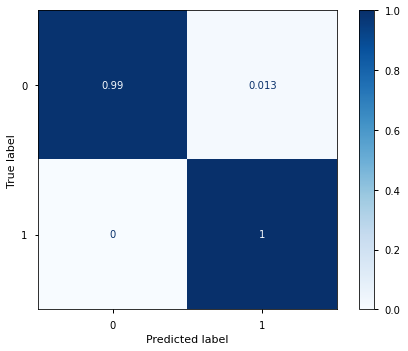

In [29]:
# how'd we do?
from sklearn.metrics import classification_report, plot_confusion_matrix , accuracy_score

print(classification_report(y_test, y_pred_test)) 
print(f"Train accuracy: {accuracy_score(y_train, y_pred_train):.4f}")
print(f"Test accuracy: {accuracy_score(y_test, y_pred_test):.4f}")

plot_confusion_matrix(svc_linear, X_test, y_test,cmap='Blues',normalize='true')
plt.show()

### Now: RBF

In [30]:
tic = time() #timing!

svc_rbf = SVC(kernel='rbf', C=1, gamma='scale') # using all default values here
svc_rbf.fit(X_train, y_train)

y_pred_train = svc_rbf.predict(X_train)
y_pred_test = svc_rbf.predict(X_test)

toc = time()
print(f"Run time is {toc-tic} seconds")

Run time is 0.010576963424682617 seconds


              precision    recall  f1-score   support

           0       1.00      0.99      0.99       152
           1       0.98      1.00      0.99       123

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

Train accuracy: 0.9973
Test accuracy: 0.9927


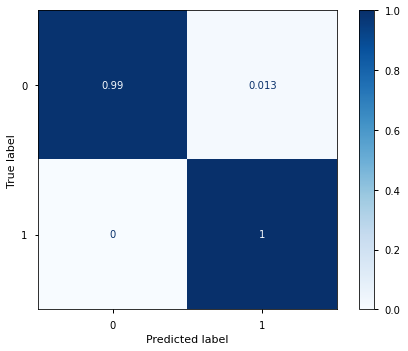

In [31]:
# how'd we do?
print(classification_report(y_test, y_pred_test)) 
print(f"Train accuracy: {accuracy_score(y_train, y_pred_train):.4f}")
print(f"Test accuracy: {accuracy_score(y_test, y_pred_test):.4f}")

plot_confusion_matrix(svc_rbf, X_test, y_test,cmap='Blues',normalize='true')
plt.show()

### And a Polynomial Kernel for good measure

In [32]:
tic = time() #timing!

svc_poly = SVC(kernel='poly', C=1, gamma='scale', degree=3) # using mostly default values here
svc_poly.fit(X_train, y_train)

y_pred_train = svc_poly.predict(X_train)
y_pred_test = svc_poly.predict(X_test)

toc = time()
print(f"Run time is {toc-tic} seconds")

Run time is 0.015946149826049805 seconds


              precision    recall  f1-score   support

           0       1.00      0.95      0.98       152
           1       0.95      1.00      0.97       123

    accuracy                           0.97       275
   macro avg       0.97      0.98      0.97       275
weighted avg       0.98      0.97      0.97       275

Train accuracy: 0.9672
Test accuracy: 0.9745


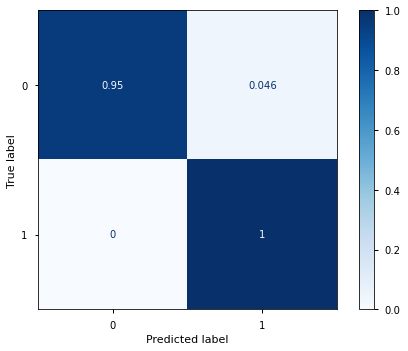

In [33]:
# how'd we do?
print(classification_report(y_test, y_pred_test)) 
print(f"Train accuracy: {accuracy_score(y_train, y_pred_train):.4f}")
print(f"Test accuracy: {accuracy_score(y_test, y_pred_test):.4f}")

plot_confusion_matrix(svc_poly, X_test, y_test,cmap='Blues',normalize='true')
plt.show()

### Adjusting C?

-----
Results at C = 0.01
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       152
           1       0.97      1.00      0.98       123

    accuracy                           0.99       275
   macro avg       0.98      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

Train accuracy: 0.9845
Test accuracy: 0.9855


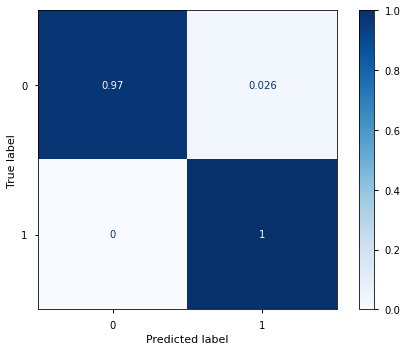

-----
Results at C = 1
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       152
           1       0.98      1.00      0.99       123

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

Train accuracy: 0.9872
Test accuracy: 0.9927


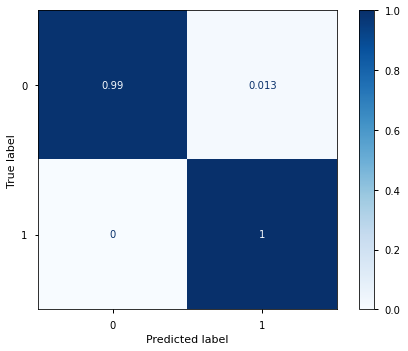

-----
Results at C = 100
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       152
           1       0.98      1.00      0.99       123

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

Train accuracy: 0.9881
Test accuracy: 0.9927


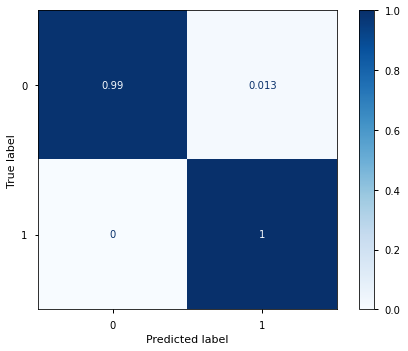

In [34]:
for c in [.01, 1, 100]: 
    svc_c = SVC(kernel='linear', C=c, gamma='scale') # going linear again
    svc_c.fit(X_train, y_train)

    y_pred_train = svc_c.predict(X_train)
    y_pred_test = svc_c.predict(X_test)

    # how'd we do?
    print("-----")
    print(f'Results at C = {c}')
    print(classification_report(y_test, y_pred_test)) 
    print(f"Train accuracy: {accuracy_score(y_train, y_pred_train):.4f}")
    print(f"Test accuracy: {accuracy_score(y_test, y_pred_test):.4f}")

    plot_confusion_matrix(svc_c, X_test, y_test,cmap='Blues',normalize='true')
    plt.show()

## Pros 

- Good for datasets with more variables than observations
- Robust against outliers
- Good performance
- Good off-the-shelf model in general for several scenarios
- Can approximate complex non-linear functions

## Cons 

- Long training time required
- Tuning required to determine optimal kernel for non-linear SVMs

## Requirements

- Scaled features
- Null values filled

## Resources

- [An Idiot's Guide to Support Vector Machines (SVMs) from MIT](https://web.mit.edu/6.034/wwwbob/svm.pdf)
- [Machine Learning Mastery's Post on Support Vector Machines for Machine Learning](https://machinelearningmastery.com/support-vector-machines-for-machine-learning/)

# Appendix/IF there's time

### Using dictionaries to record the training times of all models for all datasets


> Comparing training times across datasets and kernels.

In [35]:
# results = {}
# results['example'] = {'data':{'PRISONERS':PRISONERS,
#                              "REWSAMPLED":RESAMPLED_PRISONERS},
#                       'time': None}